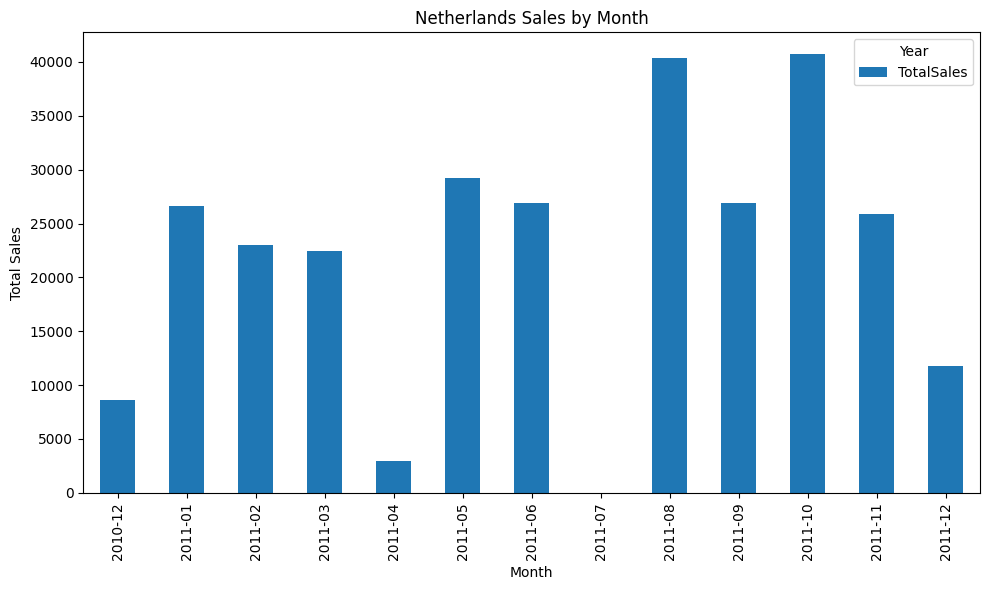

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect(r'C:\Users\Makena\OneDrive\Desktop\USIU\2nd Summer sem\DWM\End sem\DSA-2040_Practical_Exam_Mitchel_413\Data Warehousing\ETL_Process\retail_dw.db')

#--- Drill-down: Sales details for a specific country by month (example: United Kingdom)
drilldown_query = '''
SELECT s.InvoiceNo, s.InvoiceDate, s.TotalSales, strftime('%Y-%m', s.InvoiceDate) AS YearMonth
FROM SalesFact s
JOIN CustomerDim c ON s.CustomerID = c.CustomerID
WHERE c.Country = 'Netherlands'
ORDER BY YearMonth, s.InvoiceNo;
'''
drilldown_df = pd.read_sql_query(drilldown_query, conn)
conn.close()

# Pivot for visualization
pivot_df = drilldown_df.pivot_table(index=['YearMonth'], values='TotalSales', aggfunc='sum')

# Plot
pivot_df.plot(kind='bar', figsize=(10,6))
plt.title('Netherlands Sales by Month')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.legend(title='Year')
plt.tight_layout()
plt.savefig(r'C:\Users\Makena\OneDrive\Desktop\USIU\2nd Summer sem\DWM\End sem\DSA-2040_Practical_Exam_Mitchel_413\images\drilldown_sales_Netherlands_by_month.png')
plt.show()